In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import string
import matplotlib.pyplot as plt
import numpy as np
import re 
import pandas as pd
import math


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install VnCoreNLP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for VnCoreNLP: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645950 sha256=e696c952dada56affd272d2fd53d9ac701a86e8209bf1bdf4ee80d66ca2dff4b
  Stored in directory: /root/.cache/pip/wheels/3c/e9/86/706911c12e307aeb9a2702399f0dad38d36f1d6f9dde8af35e
Successfully built VnCoreNLP


In [ ]:
from vncorenlp import VnCoreNLP
vncorenlp_file = r'/content/gdrive/MyDrive/CS221/VnCoreNLP-1.1.1.jar'
vncorenlp = VnCoreNLP(vncorenlp_file)

## **Load bộ dữ liệu để phân tích**







In [ ]:
f= open('/content/gdrive/MyDrive/Report/Bộ dữ liệu/DuLieu.txt') #đường dẫn bộ ngữ liệu
lines = f.readlines() # hiển thị bộ ngữ liệu ->return một list gồm các câu
lines

['Từ những vết sẹo của bạo lực gia đình, đã có lúc, tôi đau đớn, tôi gục ngã. \n',
 'Nhưng điều quan trọng nhất là tôi tìm thấy sức mạnh nội tại và tôi chiến đấu vì nó. \n',
 'Ai trong chúng ta cũng có những cuộc chiến cá nhân nhưng điều quan trọng nhất là tin vào giá trị của bản thân.\n',
 'Đội vương miện chính mình, viết tiếp cuộc đời bằng trang hành trình nhiệt huyết, bản lĩnh cá nhân. \n',
 'Mỗi chúng ta là một chiến binh và hãy chiến đấu vì giấc mơ của mình.\n',
 'Sân nhà mình hồi ấy có rộng mấy đâu, chỉ có khoảng trời là lồng lộng phía trên đầu, nhưng đã đi hết cả tuổi thần tiên rồi, sao tôi vẫn còn nhớ tiếc.\n',
 'Tháng năm vừa rồi bánh cam đã lọt vào top 30 món rán ngon nhất thế giới do hãng tin danh tiếng CNN bình chọn.\n',
 'Hồi đó má hay cho tiền dằn túi thì mình lại dằn vặt, vì mình không biết nên chọn giữa ổ bánh mì đầy thịt hay là một ly trà sữa thơm ngon đầy thạch.\n',
 'Người ta ngây ngất trước sự hào nhoáng, mê mẩn trước sự bóng bẩy nhưng chỉ rơi nước mắt trước sự giản

Đếm tiếng -> chuyển chữ hoa thành chữ thường -> bỏ dấu câu
1. Đếm tiếng: sử dụng hàm split để tách các tiếng trong lines
2. Chuyển chữ hoa thành chữ thường: sử dụng hàm lower ( chuyển sẽ sai -> bỏ ) 
3. Bỏ dấu câu ( , . ! ? .... ): sử dụng phương pháp str.translate(). Hàm này sẽ replace những kí tự đặc biệt được miêu tả trong một mapping table. Tạo mapping table bằng hàm str.maketrans. Trong đó string.punctuation là những kí tự đặc biệt ( không bỏ dấu câu, bỏ dấu câu sẽ bị mất nghĩa ) -> bỏ -> solution khác là sử dụng re findall để tìm #Ngưng thực hiện

# **Phân tích bộ ngữ liệu**

In [ ]:
len(lines) 

60

Có tổng cộng 60 câu trong bộ ngữ liệu

In [ ]:
def split_words(lines):
  
  
  #for i in lines:
  #words_in_line = (str.split(lines.translate(str.maketrans('', '', string.punctuation))))
  words_in_line = str.split(lines) #Chia theo khoảng trắng
  numbers = len(words_in_line) #Đếm số tiếng trong câu
  return re.findall('\w+|[^\w\s]',lines, re.UNICODE),numbers

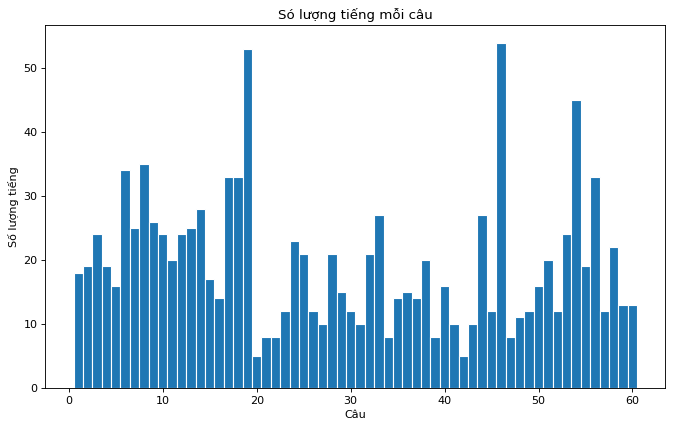

In [ ]:
numbers = []
for i in lines:
  _, count = split_words(i)
  numbers.append(count)
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
x = np.arange(1,len(lines)+1)
y=np.array(numbers)
ax.bar(x, y, width=1, edgecolor="white", linewidth=1)
plt.title("Só lượng tiếng mỗi câu")
plt.xlabel("Câu")
plt.ylabel("Số lượng tiếng")
plt.show()

In [ ]:
print("Câu có số tiếng ít nhất:", y.min())

for i in np.array(np.where(y == y.min())).flatten():
  index_min = i
  print(lines[i])

Câu có số tiếng ít nhất: 5
Học sinh học sinh học.

Quả thơm đó thơm thật.



In [ ]:
print("Câu có số tiếng nhiều nhất:", y.max())
for i in np.array(np.where(y == y.max())).flatten():
  index_max = i
  print(lines[i])

Câu có số tiếng nhiều nhất: 54
Triết học là bộ môn nghiên cứu về những vấn đề chung và cơ bản của con người, thế giới quan và vị trí của con người trong thế giới quan, những vấn đề có kết nối với chân lý, sự tồn tại, kiến thức, giá trị, quy luật, ý thức, và ngôn ngữ.



# **Tách từ**

*Phương pháp: So khớp cực đại

Đi từ cuối câu, đầu tiên so sánh xem câu đó có trong từ điển hay không? -> Xóa từ cuối,... lặp lại đến khi nào tìm ra được từ dài nhất
  
Nhược điểm:
 - Phụ thuộc nhiều vào bộ từ điển
 - Sai trong trường hợp nhập nhằng

Ưu điểm:
 -  Dễ cài đặt
 

In [ ]:
f= open('/content/gdrive/MyDrive/Report/Bộ từ điển/vocabs_tachtu.txt')
dict = f.readlines() # hiển thị dict
len(dict)

55070

In [ ]:
for i in range(0,len(dict)): #xóa \n
  dict[i] = dict[i][:-1]

B1: So sánh cả câu vào bộ từ điển

B2: Lần lượt xóa các từ ở cuối câu đến khi so khớp được với bộ từ điển ( cực đại )

B3: Xóa từ đã được so khớp và lặp lại đến khi xóa hết cả câu

Vd: 

Hôm nay trời nắng -> Không có trong bộ từ điển -> Xóa từ nắng

Hôm nay trời -> Không có trong bộ từ điển -> Xóa từ trời

Hôm nay -> Có trong bộ từ điển -> 

Lặp lại với trời nắng


In [ ]:
def tokenizer(lines,dict):
  s, _ = split_words(lines)
  
  words = []
  count = 0
  while s:
    if count == 0:
      current_word = ' '.join(s[:])
  
    if current_word in dict or current_word[0].lower() + current_word[1:] in dict or count == len(s) - 1 : #xét luôn trường hợp chữ đầu câu viết hoa
      current_word = current_word.replace(" ","_")
      words.append(current_word)
      
      s = s[len(s)-count:]
      
      count = 0
      continue
    else:
      count = count + 1
      current_word = ' '.join(s[:-count])
    
  return words


# **So sánh với thư viên VNCorenlp**

In [ ]:
#model = py_vncorenlp.VnCoreNLP(save_dir='/content/gdrive/MyDrive/CS221')
print('Tokenizing:', vncorenlp.tokenize(lines[index_min]))
print('Tokenizing:', vncorenlp.tokenize(lines[index_max]))
#vncorenlp.close()

Tokenizing: [['Quả', 'thơm', 'đó', 'thơm', 'thật', '.']]
Tokenizing: [['Triết_học', 'là', 'bộ_môn', 'nghiên_cứu', 'về', 'những', 'vấn_đề', 'chung', 'và', 'cơ_bản', 'của', 'con_người', ',', 'thế_giới_quan', 'và', 'vị_trí', 'của', 'con_người', 'trong', 'thế_giới_quan', ',', 'những', 'vấn_đề', 'có', 'kết_nối', 'với', 'chân_lý', ',', 'sự', 'tồn_tại', ',', 'kiến_thức', ',', 'giá_trị', ',', 'quy_luật', ',', 'ý_thức', ',', 'và', 'ngôn_ngữ', '.']]


In [ ]:
print('Tokenizing:',tokenizer(lines[index_min],dict))
print('Tokenizing:',tokenizer(lines[index_max],dict))

Tokenizing: ['Quả', 'thơm', 'đó', 'thơm', 'thật', '.']
Tokenizing: ['Triết_học', 'là', 'bộ_môn', 'nghiên_cứu', 'về', 'những', 'vấn_đề', 'chung', 'và', 'cơ_bản', 'của', 'con_người', ',', 'thế_giới_quan', 'và', 'vị_trí', 'của', 'con_người', 'trong', 'thế_giới_quan', ',', 'những', 'vấn_đề', 'có', 'kết_nối', 'với', 'chân_lý', ',', 'sự', 'tồn_tại', ',', 'kiến_thức', ',', 'giá_trị', ',', 'quy_luật', ',', 'ý_thức', ',', 'và', 'ngôn_ngữ', '.']


In [ ]:
import random
val = random.randint(0, 59)
# Tách bằng VNCorenlp
print('Tokenizing của VNCorelp:', vncorenlp.tokenize(lines[val]))
# Tách bằng so khớp cực đại
print('Tokenizing của thuật toán:',tokenizer(lines[val],dict))

Tokenizing của VNCorelp: [['Anh', 'yêu', 'rất', 'yêu', 'em', 'yêu', 'nhiều', 'lắm', '.']]
Tokenizing của thuật toán: ['Anh', 'yêu', 'rất', 'yêu', 'em', 'yêu', 'nhiều', 'lắm', '.']


# **Đánh giá kết quả tách từ**

In [ ]:
predict_max = []   #tách từ toàn bộ dữ liệu bằng so khớp cực đại
for line in lines:
  temp = ""
  for i in tokenizer(line,dict):
    temp = temp + i + ' '
  temp = temp + '\n'
  predict_max.append(temp)
    

In [ ]:
predict_vn = []   #tách từ toàn bộ dữ liệu bằng thư viện
for line in lines:
  temp = ""
  for i in vncorenlp.tokenize(line):
    s = ' '.join(i)
    temp = temp + s + ' '
  temp = temp + '\n'
  predict_vn.append(temp)

In [ ]:
f= open('/content/gdrive/MyDrive/Report/Bộ ngữ liệu/NguLieu_TachTu.txt')
label = f.readlines() # hiển thị bộ ngữ liệu ->return một list gồm các câu
# Bộ đã tách thủ công

Confusion Matrix thì có 4 cột: nhãn là đúng và model cũng dự đoán đúng (TP), model dự đoán sai nhưng thực tế là đúng (FN), model dự đoán đúng nhưng thực tế sai(FP), model dự đoán sai và thực tế cũng là sai 

In [ ]:
def label_true_and_false(label): #đếm số nhãn label(y_true) là từ ghép và từ đơn, từ ghép là true và từ đơn là false. Input của hàm là 1 câu
  total_label_true = 0
  total_label_false = 0
  for i in label.split():
    if len(i.split("_"))>1: total_label_true = total_label_true + 1
    else: total_label_false = total_label_false + 1
  return total_label_true, total_label_false

In [ ]:
def qc_a_line(predict,label): #input là 1 câu
  TP = 0 #True Postive (Thực tế: từ ghép ; đánh giá: từ ghép)
  FN = 0 #False Negative (Thực tế: từ ghép ; đánh giá: TH1-từ đơn, TH2-từ ghép dư/thiếu) 
  FP = 0  #False Positive (Thực tế: từ đơn ; đánh giá: từ ghép)
  TN = 0 #True Negative ((Thực tế: từ đơn ; đánh giá: từ đơn))
  index = 0
  total_label_true, total_label_false = label_true_and_false(label)
  predict = predict.split()
  label = label.split()
  stop = 0
  total_next_count = 0
  next_count = -1
  for i in range (len(label)):
    if stop != 0:
      stop = stop - 1
      continue
    if total_next_count == next_count: 
      index = index + 1
      total_next_count = 0
    count = len(label[i].split("_"))
    #print(label[i])
    #print(predict[index])
    if count > 1:  #nếu đây là từ ghép, tức là label 1
      if label[i] == predict[index]: #trường hợp predict cũng là từ ghép (True Positive )
         TP = TP + 1
         index = index + 1
      else:  #nếu đây là ghép mà predict dự đoán là từ đơn (False Negative)
        if len(predict[index].split("_")) > count:    #trường hợp là từ ghép nhưng ghép dư từ 
          next_count = len(predict[index].split("_"))
          total_next_count = total_next_count + count
          continue
        if len(predict[index+1].split("_")) > 1: count = count - 1
        index = index + count
    else:
      if label[i] == predict[index]: #là từ đơn và model dự đoán từ đơn
        index = index + 1
        TN = TN + 1
      else: #là từ đơn nhưng mà model dự đoán là từ ghép
        numbers = len(predict[index].split("_"))
        FP = FP + numbers
        index = index + 1
        stop = numbers - 1
        
  return TP, total_label_true - TP, FP, TN
      

In [ ]:
print("Dự đoán:",predict_max[1])
print("Lable:",label[1])
TP,FN,FP,TN = qc_a_line(predict_max[1],label[1])
print("True Positive:",TP,"- Trường hợp có",TP,"từ ghép được đánh giá đúng")
print("False Negative:",FN,"- Trường hợp có",FN,"từ ghép bị đánh giá sai")
print("False Positive:",FP,"- Trường hợp có",FP,"từ đơn bị đánh giá sai")
print("True Negative:",TN,"- Trường hợp có",TN,"từ đơn được đánh giá đúng")

Dự đoán: Nhưng điều quan_trọng nhất_là tôi tìm thấy sức_mạnh nội_tại và tôi chiến_đấu vì nó . 

Lable: Nhưng điều quan_trọng nhất là tôi tìm thấy sức_mạnh nội_tại và tôi chiến_đấu vì nó . 

True Positive: 4 - Trường hợp có 4 từ ghép được đánh giá đúng
False Negative: 0 - Trường hợp có 0 từ ghép bị đánh giá sai
False Positive: 2 - Trường hợp có 2 từ đơn bị đánh giá sai
True Negative: 10 - Trường hợp có 10 từ đơn được đánh giá đúng


In [ ]:
print("Dự đoán:",predict_max[3])
print("Lable:",label[3])
TP,FN,FP,TN = qc_a_line(predict_max[3],label[3])
print("True Positive:",TP,"- Trường hợp có",TP,"từ ghép được đánh giá đúng")
print("False Negative:",FN,"- Trường hợp có",FN,"từ ghép bị đánh giá sai")
print("False Positive:",FP,"- Trường hợp có",FP,"từ đơn bị đánh giá sai")
print("True Negative:",TN,"- Trường hợp có",TN,"từ đơn được đánh giá đúng")

Dự đoán: Đội vương_miện chính mình , viết tiếp cuộc_đời bằng trang hành_trình nhiệt_huyết , bản_lĩnh cá_nhân . 

Lable: Đội vương_miện chính mình , viết_tiếp cuộc_đời bằng trang_hành_trình nhiệt_huyết , bản_lĩnh cá_nhân . 

True Positive: 5 - Trường hợp có 5 từ ghép được đánh giá đúng
False Negative: 2 - Trường hợp có 2 từ ghép bị đánh giá sai
False Positive: 0 - Trường hợp có 0 từ đơn bị đánh giá sai
True Negative: 7 - Trường hợp có 7 từ đơn được đánh giá đúng


In [ ]:
def qc_text(predict,label):
  TP = 0
  FN = 0
  FP = 0
  TN = 0
  for i in range(len(predict)):
    #print(i)
    TP_temp, FN_temp, FP_temp, TN_temp = qc_a_line(predict[i],label[i])
    TP = TP + TP_temp
    FN = FN + FN_temp
    FP = FP + FP_temp
    TN = TN + TN_temp
  return {
      'Accuracy': (TP+TN) / (TP+TN+FP+FN),
      'Precision': TP / (TP + FP), 
       'Recall':  TP / ( TP + FN ),
       'True Positive': TP,
       'True Negative': TN,
       'False Positive': FP,
       'False Negative': FN
      }

In [ ]:
pd.DataFrame(
    [qc_text(predict_max,label), qc_text(predict_vn,label)], 
    index = ['Longest Matching', 'VnCoreNLP']
).astype(object).T

,Longest Matching,VnCoreNLP
Accuracy,0.892683,0.88499
Precision,0.790262,0.775281
Recall,0.796226,0.781132
True Positive,211,207
True Negative,704,701
False Positive,56,60
False Negative,54,58


## **Gán Nhãn Từ Loại bằng HMM**

# Xử lí dataset

Chia bộ dataset thành train và test

In [ ]:
data_label = open('/content/gdrive/MyDrive/Report/Bộ ngữ liệu/NguLieu_GanNhan.txt').readlines() #load lại bộ data đã gán nhãn thủ công
data = open('/content/gdrive/MyDrive/Report/Bộ ngữ liệu/NguLieu_TachTu.txt').readlines() #load bộ data nhóm đã tách từ thủ công

In [ ]:
def format_data_label(data): #chỉnh sửa lại format của dataa_label
  a = []
  for i in data:
    i.replace('CH\n','CH')
    a.extend(i.split("-"))
  return a

In [ ]:
data_label = format_data_label(data_label)

In [ ]:
data_train = []
data_test = []
count = 0
for i in data:
  i = i.replace(i[0],i[0].lower()) #viết thường
  temp = i.split(" ")
  if count >= 40:
    data_test.extend(temp)
  else: data_train.extend(temp)
  count = count + 1
data_train = list(filter(('\n').__ne__, data_train))
data_test = list(filter(('\n').__ne__, data_test))


Chia tập train/test = 40 câu/12 câu

In [ ]:
data_train_label = []
data_test_label = []
tag = []
count = 0
for i in data_label:
  
  if len(i)>1: 
    tag_current = i.split()[-1]
    if tag_current not in tag:
       tag.append(tag_current)
  if count >= 41: 
    data_test_label.append(i)                 
  else: data_train_label.append(i)
  if i =='\n':
    count = count + 1
data_train_label = list(filter(('\n').__ne__, data_train_label))
data_test_label = list(filter(('\n').__ne__, data_test_label))

In [ ]:
def count_label(data_train_label):
  array = {}
  for i in range (len(data_train_label)):
    temp = data_train_label[i].split()[-1]
    if temp not in array:
      array[temp] = 0
    else: array[temp] = array[temp] + 1
  sort = list(array)
  sort.sort()
  array = {i: array[i] for i in sort}
  fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
  x = []
  y = []
  for i in array:
    x.append(i)
    y.append(array.get(i))

  ax.bar(x, y, width=1, edgecolor="white", linewidth=1)
  plt.title("Só lượng các nhãn")
  plt.xlabel("Nhãn")
  plt.ylabel("Số lượng ")
  plt.show()

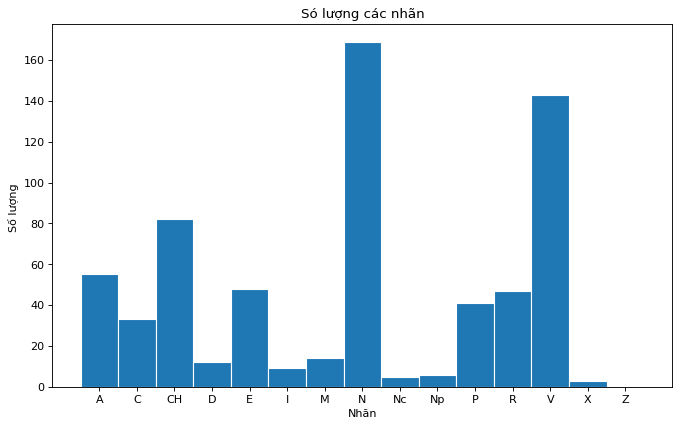

In [ ]:
count_label(data_train_label)

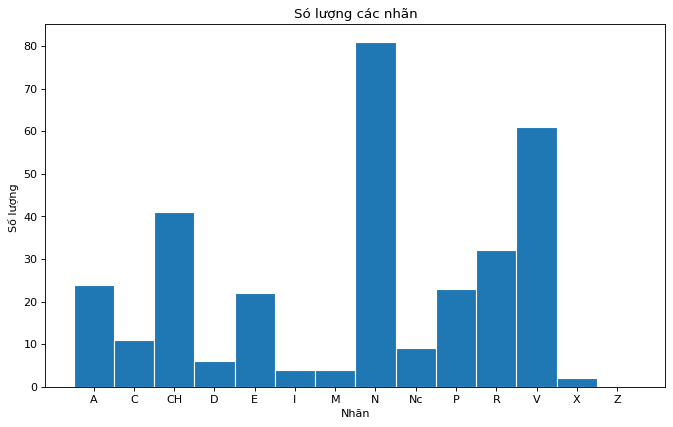

In [ ]:
count_label(data_test_label)

In [ ]:
print("Số từ trong bộ dataset train:", len(data_train))
print("Số từ trong bộ dataset test:", len(data_test))

Số từ trong bộ dataset train: 682
Số từ trong bộ dataset test: 334


Check xem có từ nào không có trong bộ từ điển

In [ ]:
vocabs = open('/content/gdrive/MyDrive/Report/Bộ từ điển/vocabs_HMM.txt').readlines()

In [ ]:
unk_words_train = []
for i in data_train:
  if i +'\n' not in vocabs and i != '\n':
    unk_words_train.append(i)
unk_words_train = set(unk_words_train)
print("Số từ của tập train không có trong từ điển là: ", len(unk_words_train))
unk_words_train
    


Số từ của tập train không có trong từ điển là:  33


{'DCG',
 'FSA',
 'Prolog',
 'UIt',
 'bánh_cam',
 'bên_ngoài',
 'bẩm',
 'câu_hỏi',
 'dâng_trào',
 'giấc_mơ',
 'giới_trẻ',
 'gục_ngã',
 'hãng_tin',
 'hòa_nhập',
 'hồi_đó',
 'hồi_ấy',
 'lao_ra',
 'ly_trà_sữa',
 'lúa_nếp',
 'lớp_lớp',
 'món_rán',
 'ngước_nhìn',
 'nhiều_hơn',
 'thơm_ngon',
 'thầm_nghĩ',
 'thế_này',
 'trang_hành_trình',
 'tới_đâu',
 'viết_tiếp',
 'văn_phạm',
 'đáy_lòng',
 'đổ_lỗi',
 'ổ_bánh_mì'}

In [ ]:
unk_words_test = []
for i in data_test:
  if i +'\n' not in vocabs and i != '\n':
    unk_words_test.append(i)
unk_words_test = set(unk_words_test)
print("Số từ của tập test không có trong từ điển là: ", len(unk_words_test))
unk_words_test
    


Số từ của tập test không có trong từ điển là:  6


{'khả', 'matcha', 'ngang_nhau', 'sinh_ra', 'thế_giới_quan_duy_vật', 'ánh_mắt'}

# Xây dựng 2 ma trận A ( chuyển trạng thái ) và ma trận B ( emisson )

Gồm 5 tham số:

- Tập tag là các trạng thái 
- Tập train: Các từ trong câu
- A là ma trận chuyển trạng thái

- B là ma trận thể hiện
- Bộ từ điển

In [ ]:
tag = list(set(tag))
tag.sort()
print("Số tag trong ngữ liệu: ", tag)

Số tag trong ngữ liệu:  ['A', 'C', 'CH', 'D', 'E', 'I', 'M', 'N', 'Nc', 'Np', 'P', 'R', 'V', 'X', 'Z']


In [ ]:
tag.insert(0,'<s>') # thêm vào tag kí tự bắt đầu một cuỗi

**Ma trận chuyển trạng thái A**

- **Ý nghĩa** của ma trận A: tính xác suất mà một postag này chuyển sang một postag khác ( giải thích rõ hơn ở bên dưới )  

**Bước 1**: Tạo ma trận A với kích thước tag x tag ( giá trị 0 )

**Bước 2**: Duyệt lần lượt cặp từ trong bộ dữ liệu train -> lấy 2 postag của 2 từ đó

**Bước 3**: Cộng 1 vào vị trí tương ứng trong ma trận A

**Bước 4**: Cộng hệ số Laplace cho tất cả các phần tử ( 0,001 )

**Bước 5**: Tính xác suất smoothing

In [ ]:
def matrix_status(train,tag): #input là tập chữ, tag -> output là số lượng tương ứng ( chưa được xử lí thành xác suất)
  A = np.zeros((len(tag),len(tag))) # tạo ma trận A value default = 0
  word_current, tag_current = train[0].split()  #Lấy postag của chữ bắt đầu của bộ ngữ liệu 
  j = tag.index(tag_current) 
  A[0][j] = A[0][j] + 1      #Cộng 1 vào vị trí mà tag <s> chuyển sang tag tương ứng của chữ đầu câu 
  A[0][0] =  A[0][0] + 1  #Cộng 1 vào số lượng tag <s>
  A[j][0] = A[j][0] + 1
  for i in range (1,len(train)): #Duyệt từ tiếp theo tới hết tập chữ
    t = True 
    if train[i] == '\n' :  #Không tính kí tự xuống dòng
      continue
    word_current, tag_current = train[i].split() #Lấy postag hiện tại
    if train[i-1]!='\n': word_pre, tag_pre = train[i-1].split() #Nếu trước đó là từ, sẽ lấy postag của từ đó
    else:  #Nếu trước đó là kí tứ xuống dòng -> tương đương postag sẽ CH ( dấu chấm )
      tag_pre='CH'
      t = False
    j = tag.index(tag_current)
    i_ = tag.index(tag_pre)
    if tag_pre == 'CH' and t==False: #Do CH sẽ có 2 trường hợp. Đầu tiên là chấm cuối câu, hai là dấu câu ở giữa câu, nên cần biến bool t để đánh dấu. False - đầu câu, True - giữa câu
      A[0][j] = A[0][j] + 1    # Tương tự
      A[0][0] = A[0][0] + 1    #Cộng 1 vào số lượng tag <s>
    else: 
      A[i_][j] =  A[i_][j] + 1 #Cộng 1 vào vị trí tag_pre sẽ chuyển sang tag_now
    if i == len(train) - 1: continue  
    A[j][0] =  A[j][0] + 1 #Cộng 1 vào số lượng tag j'''
    
  return A

In [ ]:
A = matrix_status(data_train_label,tag) #Ma trận số lượng các postag

laplace = 0.001
A[:,0] = A[:,0] + laplace * (len(tag)-1) # Điều chỉnh tần số 
A[:,1:] = A[:,1:] + laplace
for i in range(0,len(tag)): # Tính xác suất smoothing
  A[i,:] = A[i,:] / A[i,0]

df = pd.DataFrame(
    A[:,:], 
    index = tag, 
    columns = tag
)
df


,<s>,A,C,CH,D,E,I,M,N,Nc,Np,P,R,V,X,Z
<s>,1.0,0.000985,0.000985,0.000985,0.000985,0.986207,0.000985,0.000985,0.000985,0.000985,0.000985,0.000985,0.000985,0.000985,0.000985,0.000985
A,1.0,0.071427,0.053575,0.303508,0.017870,0.107132,0.035723,0.000018,0.160689,0.000018,0.000018,0.053575,0.107132,0.089280,0.000018,0.000018
C,1.0,0.088226,0.000029,0.000029,0.000029,0.000029,0.058827,0.029428,0.205821,0.000029,0.000029,0.117625,0.176422,0.323416,0.000029,0.000029
CH,1.0,0.036591,0.073170,0.000012,0.024398,0.060977,0.000012,0.012205,0.353606,0.036591,0.012205,0.134134,0.085362,0.158520,0.012205,0.000012
D,1.0,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.076911,0.691587,0.076911,0.000077,0.153746,0.000077,0.000077,0.000077,0.000077
E,1.0,0.000020,0.000020,0.000020,0.081628,0.020422,0.000020,0.020422,0.612078,0.000020,0.040824,0.142834,0.020422,0.061226,0.000020,0.000020
I,1.0,0.099950,0.000100,0.499351,0.000100,0.000100,0.000100,0.000100,0.099950,0.000100,0.000100,0.099950,0.000100,0.199800,0.000100,0.000100
M,1.0,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.799267,0.133267,0.000067,0.000067,0.000067,0.000067,0.066667,0.000067
N,1.0,0.164697,0.082352,0.158815,0.005888,0.058824,0.023533,0.017651,0.123524,0.000006,0.023533,0.029415,0.047061,0.252925,0.005888,0.005888
Nc,1.0,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.665170,0.000166,0.000166,0.000166,0.000166,0.332668,0.000166,0.000166


Phân tích rõ hơn idea của ma trận A

Ví dụ cụ thể xác suất chuyển trạng thái: 

  - Vị trí A[1,1] = 0.07, đó là xác suất mà một nhãn A sẽ chuyển sang một nhãn A khác

  - Vị trí A[1,2] = 0.05, xác suất mà nhãn A sẽ chuyển sang nhãn C

--> Xác suất mà một nhãn i sẽ chuyển sang nhãn j




**Ma trận thể hiện B**

 - **Ý nghĩa**: xác suất mà một từ trong câu mang postag tương ứng

**Bước 1**: Khởi tạo ma trận B với kích thước tag x vocabs ( giá trị 0 )

**Bước 2**: Duyệt các từ trong bộ dữ liệu train -> lấy postag của từ đó

**Bước 3**: Cộng 1 vào vị trí postag tương ứng

**Bước 4**: Cộng Laplace và tính xác suất như ma trận A

In [ ]:
def matrix_emisson(train,tag, vocabs): #input là tập train, tag và một bộ từ điển vocabs

  B = np.zeros((len(tag),len(vocabs))) #tạo ma trận B, thêm 1 cột cuối cùng để tính số lượng
  for i in range(0,len(train)):
     if train[i] == '\n' : continue # nếu nó là \n thì skip
     word_current, tag_current = train[i].split() #tách lấy từ và tag
     
     if word_current+'\n' not in vocabs: #nếu từ đó không có trong bộ từ điển, thì nó sẽ là từ unk
       if (word_current[0].lower() + word_current[1:] + '\n') in vocabs:
         word_current =  word_current[0].lower() + word_current[1:]
         index_in_vocabs = vocabs.index(word_current+'\n')
       else:  
         index_in_vocabs = vocabs.index('--unk--\n')
     else:
        index_in_vocabs = vocabs.index(word_current+'\n') #lấy vị trí của nó trong bộ từ điển
     B[tag.index(tag_current)][index_in_vocabs] =B[tag.index(tag_current)][index_in_vocabs] + 1 #Cộng 1 vào vị trí tương ứng trong ma trận B
     B[tag.index(tag_current)][-1] = B[tag.index(tag_current)][-1] + 1 # Cộng 1 vào cột số lượng postag'''
  return B


In [ ]:
laplace = 0.001
B = matrix_emisson(data_train_label,  tag, vocabs)
B[:,-1] = B[:,-1] + laplace * (len(vocabs))
B[:,:-1] = B[:,:-1] + laplace
for i in range(0,len(tag)):
  B[i,:] = B[i,:] / B[i,-1]

df1 = pd.DataFrame(
    B[:,:], 
    index = tag, 
    columns = vocabs 
    )
df1

,'\n,''\n,-\n,--\n,!\n,"""\n",#\n,$\n,%\n,&\n,...,zone\n,Zone\n,zones\n,Zones\n,zoning\n,Zsa\n,Zulu\n,Zurich\n,Zurkuhlen\n,Zurn
<s>,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,1.0
A,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,1.0
C,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,1.0
CH,0.000007,0.000007,0.000007,0.000007,0.007250,0.000007,0.000007,0.000007,0.000007,0.000007,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,1.0
D,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,1.0
E,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,1.0
I,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,1.0
M,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,1.0
N,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,1.0
Nc,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,1.0


Phân tích rõ hơn idea của ma trận B

Ví dụ ma trận B: 

 - Từ có Zone có xác suất là 0.000009 mang nhãn A 

# **Thuật toán Viterbi**

Do không dự đoán nhãn --s-- và ma trận A, B không tính xác suất của --s-- nên ta sẽ xóa các cột --s-- trong ma trận A, B. Ở ma trận B ta cũng sẽ xóa luôn cột cuối cùng ( cột tổng )

In [ ]:
A = A[:,1:]
B = B[1:,:-1]

**Bước Initialization**: Tạo 2 ma trận:
- Ma trận probs: để tìm ma trận xác suất các từ trong câu sẽ mang nhãn gì. Mỗi cột sẽ là các từ trong câu, còn mỗi hàng sẽ là postag tương ứng. Ví dụ từ 'từ' sẽ là cột đầu tiên ở ma trận probs và ta sẽ tính 17 xác suất mà từ 'từ' sẽ có 

- Ma trận paths ( đề cập sau )



**Step 1**: khởi tạo ma trận probs với kích thước là tag x tập câu. 

**Step 2**: với từ đầu tiên trong tập câu, ta sẽ tính xem 17 xác suất postag của từ đó bằng cách lấy xác suất ( A ) của **--s-- chuyển sang postag tương ứng** + xác suất ( B ) của **từ đó mang postag tương ứng**

Để tránh số quá nhỏ trong việc nhân 2 xác suất nên ta sẽ sử dụng log + log





In [ ]:
def initialize(A, B,train_words,tag,vocabs):
  probs = np.zeros((len(tag), len(train_words)))
  paths = np.zeros((len(tag), len(train_words)),dtype=int)
  index_s = 0      #tag.index("<s>") # -> bắt đầu một câu <s>
  for i in range(len(tag)):
    if train_words[0]+'\n' not in vocabs: 
      if train_words[0][0].lower() +train_words[0][1:] + '\n' in vocabs:
         train_words[0] =  train_words[0][0].lower() + train_words[0][1:]
         index = vocabs.index(train_words[0]+'\n')
      else:
        index = vocabs.index('--unk--\n') # Nếu từ đó không có thì gán là từ unk
    else: index = vocabs.index(train_words[0]+'\n')
    #do A ta xóa 1 cột, B xóa 1 hàng nên t phải trừ 1 tương ứng

    probs[i,0] = math.log(A[index_s,i-1]) + math.log(B[i-1,index]) #sử dụng log để hạn chế việc số quá nhỏ

    
  return probs, paths


In [ ]:
probs_train, paths_train = initialize(A, B, data_train , tag, vocabs)
print('probs_train[0, 0]:', probs_train[0, 0])
print('probs_train[1, 0]:', probs_train[1, 0])  

probs_train[0, 0]: -17.857000080593608
probs_train[1, 0]: -18.540559803637052


In [ ]:
probs_test, paths_test = initialize(A, B, data_test, tag, vocabs )
print('probs_test[0, 0]:', probs_test[0, 0])
print('probs_test[1, 0]:', probs_test[1, 0]) 


probs_test[0, 0]: -17.857000080593608
probs_test[1, 0]: -18.540559803637052


**Bước Forward**

Tiếp tục hoàn thiện ma trận probs

Ở ma trận probs, xác suất từ tiếp theo trong câu sẽ bằng max (xác suất tag của từ trước trong ma trận probs + xác suất chuyển tag của từ hiện tại ) + xác suất B

In [ ]:
def forward(A, B,vocabs,probs, paths,train_words,tag):
    
    for i in range(1, len(train_words)): #train các từ tiếp theo
        if train_words[i]+'\n' not in vocabs:
          if train_words[0][0].lower() +train_words[0][1:] + '\n' in vocabs:
            train_words[0] =  train_words[0][0].lower() + train_words[0][1:]
            index = vocabs.index(train_words[0]+'\n')
          else:
            index = vocabs.index('--unk--\n')
        else:  index = vocabs.index(train_words[i]+'\n')

        for j in range(len(tag)): #fill các xác suất của từ tương ứng trong ma trận probs
            prob = []
            for k in range(len(tag)): #xét xác suất của từ trước để tìm xác suất lớn nhất của từ trước + từ hiện tại
                prob.append(probs[k,i-1]+ math.log(A[k,j-1]))  
            probs[j,i] = max(prob)  + math.log(B[j-1,index])
            paths[j,i] = prob.index(max(prob))
       

    return probs, paths

In [ ]:
probs_train, paths_train = forward(A, B, vocabs, probs_train, paths_train, data_train, tag)
print('probs_train[0, 1]:', probs_train[0, 1]) 
print('paths_train[0, 1]:', paths_train[0, 1])

probs_train[0, 1]: -24.783552811187214
paths_train[0, 1]: 5


In [ ]:
probs_test, paths_test = forward(A, B, vocabs, probs_test, paths_test,data_test,tag)
print('probs_test[0, 1]:', probs_test[0, 1]) 
print('paths_test[0, 1]:', paths_test[0, 1])

probs_test[0, 1]: -29.572086889779197
paths_test[0, 1]: 9


**Bước Backward**

Base theo quy hoạch động, từ ma trận paths và probs truy xuất ngược về.



Step 1: Trong ma trận probs, ở từ cuối cùng trong data đưa vào, check hết các tag xem tag nào có xác suất lớn nhất, lấy tag đó.

Step 2: Bắt đầu xét tiếp các từ còn lại, dựa vào ma trận paths đã save đường đi để truy xuất tag predict

In [ ]:
def backward(probs, paths, data, tag):
    pred = np.empty(len(data),dtype=object) #ma trận dự đoán

    prob_last_word = probs[:,-1].max()
    index_tag= probs[:,-1].argmax()

    pred[-1] = tag[index_tag]
    
    for i in range(len(data)-1, 0, -1): #đi ngược lại từ từ cuối cùng đến từ đầu câu ( xét ma trận path)
        pred[i - 1] = tag[ paths[   tag.index(pred[i]), i   ]]
     
    return pred

In [ ]:
test_pred = backward(probs_test, paths_test, data_test, tag)
m = len(test_pred)

print('Dự đoán cho test_pred[0:7]')
print(data_test[0:7])
print(test_pred[0:7])
print(data_test_label[0:7])


Dự đoán cho test_pred[0:7]
['con', 'cá_rô', 'rục_rịch', 'trong', 'rổ', 'réo', 'róc_rách']
['Nc' 'N' 'V' 'E' 'D' 'N' 'A']
['Con Nc', 'cá_rô N', 'rục_rịch V', 'trong E', 'rổ N', 'réo V', 'róc_rách A']


# **Đánh giá model**

In [ ]:
y_true = [] #lấy nhãn
for i in data_test_label:
  if i =='\n': continue
  y_true.append(i.split()[-1])


**Sử dụng HMM**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, test_pred))

              precision    recall  f1-score   support

           A       0.47      0.28      0.35        25
           C       0.60      1.00      0.75        12
          CH       0.88      1.00      0.93        42
           D       0.45      0.71      0.56         7
           E       0.69      0.87      0.77        23
           I       0.67      0.80      0.73         5
           M       0.80      0.80      0.80         5
           N       0.75      0.51      0.61        82
          Nc       0.17      0.10      0.12        10
           P       0.60      0.62      0.61        24
           R       0.48      0.67      0.56        33
           V       0.63      0.68      0.65        62
           X       0.00      0.00      0.00         3
           Z       0.00      0.00      0.00         1

    accuracy                           0.65       334
   macro avg       0.51      0.57      0.53       334
weighted avg       0.64      0.65      0.63       334



**Sử dụng VnCoreNLP**

In [ ]:
pred_vn = []
for i in data_test:
  i = i.replace("_"," ")
  pred_vn.append(vncorenlp.pos_tag(i)[0][0][-1])

In [ ]:
print(classification_report(y_true, pred_vn))

              precision    recall  f1-score   support

           A       0.83      0.76      0.79        25
           C       0.90      0.75      0.82        12
          CH       1.00      1.00      1.00        42
          Cc       0.00      0.00      0.00         0
           D       0.00      0.00      0.00         7
           E       0.96      0.96      0.96        23
           I       0.00      0.00      0.00         5
           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         5
           N       0.84      0.89      0.86        82
          Nb       0.00      0.00      0.00         0
          Nc       0.00      0.00      0.00        10
           P       0.89      1.00      0.94        24
           R       1.00      0.73      0.84        33
           T       0.00      0.00      0.00         0
           V       0.76      0.94      0.84        62
           X       1.00      1.00      1.00         3
           Z       0.00    